In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/analizdeneme/hyundi.csv')

In [ ]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


In [ ]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


In [ ]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


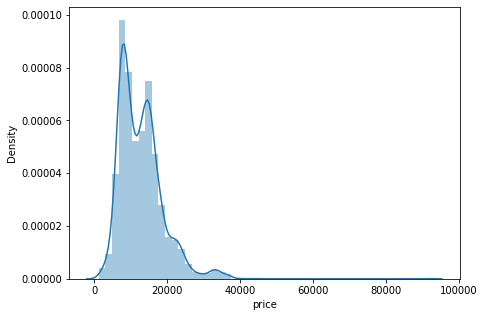

In [ ]:
plt.figure(figsize=(7,5))
sns.distplot(df["price"]);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


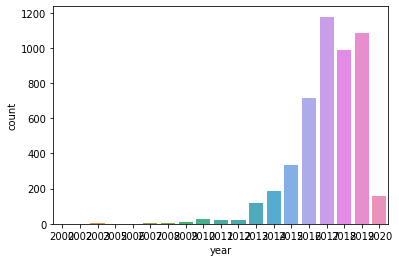

In [ ]:
sns.countplot(df['year']);

In [ ]:
df.corr()

,year,price,mileage,tax(£),mpg,engineSize
year,1.000000,0.575765,-0.716325,0.271535,-0.180792,-0.034544
price,0.575765,1.000000,-0.443576,0.321028,-0.320355,0.522384
mileage,-0.716325,-0.443576,1.000000,-0.205910,0.181491,0.178697
tax(£),0.271535,0.321028,-0.205910,1.000000,-0.451991,0.224927
mpg,-0.180792,-0.320355,0.181491,-0.451991,1.000000,-0.212200
engineSize,-0.034544,0.522384,0.178697,0.224927,-0.212200,1.000000


In [ ]:
df.corr()['price'].sort_values()

mileage      -0.443576
mpg          -0.320355
tax(£)        0.321028
engineSize    0.522384
year          0.575765
price         1.000000
Name: price, dtype: float64

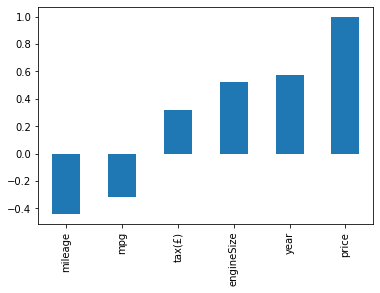

In [ ]:
df.corr()['price'].sort_values().plot(kind="bar");

In [ ]:
df['price'].max()

92000

In [ ]:
df['price'].min()

1200

In [ ]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')

In [ ]:
len(df.index)

4860

In [ ]:
#Bağımsız Değişken
x = df[['year','engineSize']].values

#Bağımlı Değişken
y = df['price'].values

In [ ]:
x

array([[2.017e+03, 1.200e+00],
       [2.016e+03, 2.000e+00],
       [2.016e+03, 1.700e+00],
       ...,
       [2.017e+03, 1.000e+00],
       [2.018e+03, 1.600e+00],
       [2.016e+03, 1.700e+00]])

In [ ]:
y

array([ 7999, 14499, 11399, ...,  6830, 13994, 15999])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [ ]:
x_train

array([[2.014e+03, 1.200e+00],
       [2.018e+03, 1.600e+00],
       [2.014e+03, 1.700e+00],
       ...,
       [2.015e+03, 2.200e+00],
       [2.015e+03, 1.700e+00],
       [2.018e+03, 1.600e+00]])

In [ ]:
x_test

array([[2.019e+03, 1.600e+00],
       [2.018e+03, 1.600e+00],
       [2.018e+03, 1.000e+00],
       ...,
       [2.016e+03, 1.400e+00],
       [2.018e+03, 1.600e+00],
       [2.015e+03, 1.200e+00]])

In [ ]:
len(x_train)

3256

In [ ]:
len(x_test)

1604

In [ ]:
x_train.shape

(3256, 2)

In [ ]:
x_test.shape

(1604, 2)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
import tensorflow as tf 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
x_train.shape

(3256, 2)

In [ ]:

model = Sequential()

model.add(Dense(10,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(5,activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam",loss="mse")

In [ ]:
model.fit(x=x_train, y=y_train, epochs=300,validation_data=(x_test,y_test),verbose=1)

Epoch 1/300
102/102 [==============================] - 3s 15ms/step - loss: 199262752.0000 - val_loss: 196819424.0000
Epoch 2/300
102/102 [==============================] - 1s 9ms/step - loss: 199150384.0000 - val_loss: 196571904.0000
Epoch 3/300
102/102 [==============================] - 1s 8ms/step - loss: 198626576.0000 - val_loss: 195696544.0000
Epoch 4/300
102/102 [==============================] - 0s 5ms/step - loss: 197183440.0000 - val_loss: 193560592.0000
Epoch 5/300
102/102 [==============================] - 1s 5ms/step - loss: 193961360.0000 - val_loss: 189060352.0000
Epoch 6/300
102/102 [==============================] - 1s 5ms/step - loss: 187702496.0000 - val_loss: 180966224.0000
Epoch 7/300
102/102 [==============================] - 1s 5ms/step - loss: 177325152.0000 - val_loss: 168433616.0000
Epoch 8/300
102/102 [==============================] - 1s 5ms/step - loss: 162233216.0000 - val_loss: 151093184.0000
Epoch 9/300
102/102 [==============================] - 0s 5ms/s

In [ ]:
kayipVeri = pd.DataFrame(model.history.history)

In [ ]:
kayipVeri.head()

,loss,val_loss
0,199262752.0,196819424.0
1,199150384.0,196571904.0
2,198626576.0,195696544.0
3,197183440.0,193560592.0
4,193961360.0,189060352.0


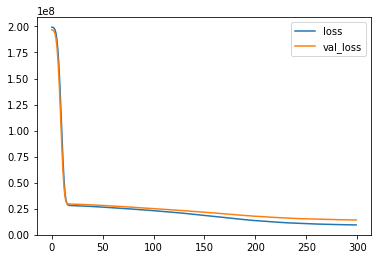

In [ ]:
kayipVeri.plot();

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
tahmin = model.predict(x_test)

In [ ]:
tahmin

array([[18449.18  ],
       [15981.093 ],
       [ 9908.978 ],
       ...,
       [ 9035.224 ],
       [15981.093 ],
       [ 6850.8647]], dtype=float32)

In [ ]:
y_test

array([17990, 17150,  7040, ...,  6998, 14675,  6799])

In [ ]:
mean_absolute_error(y_test,tahmin)

2344.361145323946

In [ ]:
df.describe()

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


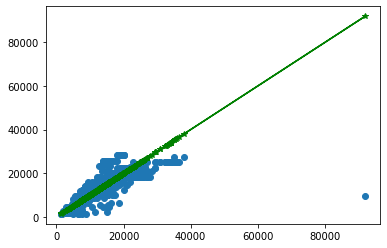

In [ ]:
plt.scatter(y_test,tahmin)
plt.plot(y_test,y_test,"g-*");

In [ ]:
df['price']

0        7999
1       14499
2       11399
3        6499
4       10199
        ...  
4855     8680
4856     7830
4857     6830
4858    13994
4859    15999
Name: price, Length: 4860, dtype: int64

In [ ]:
df['price'].min()

1200

In [ ]:
df['price'].max()

92000

In [ ]:
df['price'].mean()

12750.131069958848